In [4]:
import numpy as np
import torch
from matplotlib import pyplot as plt


#  Logistic Regression



In [34]:
# create linear data 

np.random.seed(123)
x = np.random.randint(0,100, (100,10))
delta = np.random.uniform(-10,10, x.shape)

X = np.add(np.dot(x, 0.4) ,delta)
y = np.random.randint(0,2, (100,))


# print( y[0:20])
print(y.shape)

(100,)


loss at last epoch: 0.6658939288224325


(0.549037198650473, 0)

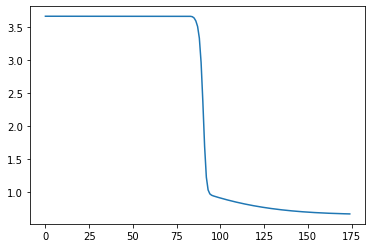

In [35]:
class LogisticRegression():
    def __init__(self, x,y):
        self.x = x
        self.y = y
    
    
    def sigmoid(self, z):
#         print(1/(1+np.exp(-z)))
        return 1/(1+np.exp(-z))
    
    def cross_entropy(self, x, y, weights ):
        z = np.dot(x , weights)
        return -np.sum(y*np.log(self.sigmoid(z)+0.001) + (1-y)*np.log(1-self.sigmoid(z)+.001) ) /len(x)
             
    
    def train(self, alpha, epochs=25):
        self.x = np.insert(self.x, 0, values=0, axis=1 )
        weights = np.ones(self.x.shape[1])
        
        loss = []
        N = len(self.x)
        
        for i in range(epochs):
            z = np.dot(self.x , weights)
            h = self.sigmoid(z)
            
            derivative = np.dot( self.x.T, h - self.y)
            weights -= alpha*derivative/ N

            loss.append(self.cross_entropy(self.x, self.y, weights))
        
        self.weights = weights
        self.loss = loss
        print(f'loss at last epoch: {loss[-1]}')
        plt.plot(loss)
    
    def predict(self, x):
        
        x = np.insert(x, 0, 0, axis=0)
        z = np.dot(x, self.weights)
        class_prob = self.sigmoid(z)
        label = 1 if class_prob>0.5 else 0
#         print(class_prob)
        return max(class_prob, 1-class_prob), label   
    
model = LogisticRegression(X, y)
model.train(0.001, 175)
model.predict([1,5,7,4,7,4,6,7,8,5])
        
        
        
        
        
        

# Logistic Sklearn

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score, classification_report
from sklearn.model_selection import train_test_split


LR = LogisticRegression(fit_intercept=True).fit(X, y)

yhat = LR.predict(X)

xnew = np.array([1,5,7,4,7,4,6,7,8,5]).reshape(-1, 10)

print(LR.predict_proba(xnew), LR.predict(xnew))

loss = log_loss(y, yhat)

# wine
from sklearn.datasets import load_wine

data = load_wine()

print(data.data.shape)
print(data.target.shape)
print(data.target_names)

dataset = data.data
label = data.target 

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.3, random_state=3233)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

lr = LogisticRegression().fit(x_train, y_train)

yhat = lr.predict(x_test)
print(classification_report(y_test, yhat))



[[0.55008573 0.44991427]] [0]
(178, 13)
(178,)
['class_0' 'class_1' 'class_2']
(70, 10) (30, 10)
(70,) (30,)
              precision    recall  f1-score   support

           0       0.36      0.27      0.31        15
           1       0.42      0.53      0.47        15

    accuracy                           0.40        30
   macro avg       0.39      0.40      0.39        30
weighted avg       0.39      0.40      0.39        30



# KNN

In [106]:
import collections
from sklearn import neighbors
from sklearn.datasets import load_iris
data = load_iris()

x = data.data[:,:2]
y = data.target

x = x[data.target!=2]
y = y[data.target!=2]


print(x.shape)
print(y.shape)
print(np.unique(y))

k = 3
# using sklearn
# nn = neighbors.KNeighborsClassifier(k).fit(x,y)
# pred = np.array([100, 1.6]).reshape(-1,2)

# print(nn.predict(pred))
# print(nn.predict_proba(pred))



class NearestNeighbor():
    def __init__(self, k):
        self.k = k
        
    def fit(self, x, y):
        """
        just take in the values, and store
        """
        self.x_train = x
        self.y_train = y

    def _distance(self, distance, x_test, datapoint ):
        
        if distance!='euclidean':
            print("distance function not supported")
            exit()

        return np.sqrt(np.sum(np.square(x_test-datapoint)))
    
    def predict(self, x_test, distance='euclidean', weights='uniform'):
        """
        calculate distance between x_test and every single row in x_train, 
        do majority vote (or weighted vote) to assign to a class, return class
        calculate probability of assigning to a class from softmax? maybe-let's see 
        """
        distances = []
        l = np.unique(self.y_train)

        #calculate all distances
        for point in self.x_train: 
            distances.append(self._distance('euclidean', x_test, point))

        #sorts and returns idxes
        idxes = np.argsort(distances)[:self.k]
        
        labels = self.y_train[np.array(idxes)]
        
        self.label = np.argmax(labels)
        cntr = collections.Counter(labels)
        
        self.label_proba = np.array([0.0]*len(l))

        for idx in cntr: 
            self.label_proba[idx] = np.round(float(cntr[idx])/float(self.k), 3)
        
            
        
        
print(x[1] , y[1])      
knn = NearestNeighbor(3)
knn.fit(x,y)
knn.predict( np.array((2,0)), 'euclidean')
print(knn.label)
print(knn.label_proba)

    
    
    
    

(100, 2)
(100,)
[0 1]
[4.9 3. ] 0
1
[0.667 0.333]


# Kmeans

[[ 1.39319803  0.8087137 ]
 [-2.98365903  9.07540502]
 [-6.16169777  1.84983391]
 [-8.43040462  7.35333713]]
<class 'numpy.ndarray'>
[[ 1.39319803  0.8087137 ]
 [-2.98365903  9.07540502]
 [-6.16169777  1.84983391]
 [-8.43040462  7.35333713]]


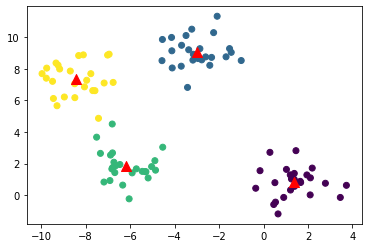

In [188]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans


X, y = make_blobs(n_samples=100, n_features=2, centers=4, random_state=3233)
kmeans = KMeans(n_clusters=4, random_state=3233).fit(X,y)

print(kmeans.cluster_centers_)

print(type(kmeans.cluster_centers_))
print(kmeans.cluster_centers_)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_.astype(float))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', s=100, c='r')



sse:  207.39267386567653
[307.1924105147153, 223.49956892039748, 208.31016698338195, 207.39267386567653, 207.39267386567653]
optimal sse:  119.03448860403975
optimal centers {0: array([1.39319803, 0.8087137 ]), 1: array([-2.98365903,  9.07540502]), 2: array([-6.16169777,  1.84983391]), 3: array([-8.43040462,  7.35333713])}
predicted cluster:  0


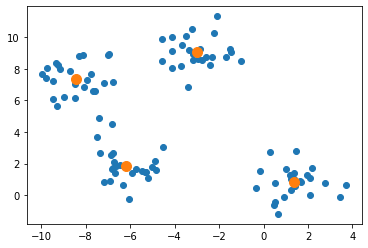

In [299]:
# Kmeans from scratch 

import random 

class Kmeans():
    def __init__(self, n_centers, n_iter, tol=0.001):
        self.k = n_centers
        self.n_iter = n_iter
        self.tolerance = tol
    
    def fit(self, X):
        """
        1- pick k centers randomly
        2- in a loop for n_iters do:
            a: find distance of all values from the k centers and assign them to their centers
            b: calculate mean of values in each k centers as the new set of centers 
            c: calculate sum of difference of all values from their centroids and save to list
        """
        self.centeroids = {}
        for i in range(self.k):
            self.centeroids[i] = random.choice(X)
        
        self.iter_sse=[]
        for it in range(self.n_iter):
            
            self.classification = {}
            
            for i in range(self.k): 
                self.classification[i] = []
               
            for point in X: 
                curr_distance = [np.linalg.norm(point- self.centeroids[c]) for c in self.centeroids]
                
                p_class = curr_distance.index(min(curr_distance))
                self.classification[p_class].append(point)
            
            old_cluster = self.centeroids
            
            for i in self.classification:
                self.centeroids[i] = np.average(self.classification[i], axis=0)
            
            self.iter_sse.append(self.sse_)

            is_optimized=False
            
            if it >=2 and  (self.iter_sse[-2] - self.iter_sse[-1]) < self.tolerance: 
#                 print("breaking point", it, (self.iter_sse[-1] - self.iter_sse[-2]))
                is_optimized = True
            
            if  is_optimized: 
                break
            
            
#             for 
        
   
    @property
    def sse_(self):
        sse = []
        for i in range(self.k):
            center = self.centeroids[i]
            sse_i = []
            for point in self.classification[i]:
                sse_i.append(np.linalg.norm(point-center))
            
            sse.append(sum(sse_i))
        return sum(sse)
            
            
    
    def predict(self, x_test):
        """
        calculate distance to each centroids and assign 
        the cluster # associated with closest centroid
        """
        min_sse = float('inf')
        cluster_assignment = self.k + 1
        for i in range(self.k): 
            curr_sse = np.linalg.norm(x_test - self.centeroids[i])
            if curr_sse < min_sse: 
                min_sse = curr_sse
                cluster_assignment = i
        return cluster_assignment
            
        

    
km = Kmeans(n_centers=4, n_iter=20 )
km.fit(X)

# print(km.centers)
print("sse: ",  km.sse_)
print(km.iter_sse)
c = np.row_stack([km.centeroids[i] for i in km.centeroids])

num_runs = 10 

min_sse = float('inf')
opt_centeroids = []
opt_classifications = []

for i in range(num_runs):
    km = Kmeans(n_centers=4, n_iter=20 )
    km.fit(X)
    if km.sse_ < min_sse: 
        model = km
        min_sse = km.sse_
        opt_centeroids = km.centeroids
        opt_classifications = km.classification
        
print("optimal sse: ",  min_sse)
print("optimal centers", opt_centeroids)


c = np.row_stack([opt_centeroids[i] for i in opt_centeroids])


print("predicted cluster: ", model.predict([2,1]))


plt.scatter(X[:,0], X[:, 1])
plt.scatter(c[:, 0], c[:, 1], s=100)


